In [156]:
import pandas as pd
import numpy as np
import os
import glob
import datetime
%matplotlib inline

In [110]:
import matplotlib.pylab as plt
# plt.rcParams['figure.figsize'] = 16, 12
# plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['figure.figsize'] = 9, 6

#Aggregovane informacie
Z roznych datasetov som zobral priebeh chyby a spocital nad nimi priemernu, maximalnu chybu a dalsie kvantily ako aj standardnu odchylku

In [180]:
filename = "../data/01_zilina_suma.csv"
# data = pd.DataFrame.from_csv(filename, index_col=[0,1])
data = pd.read_csv(filename, sep=',')

def get_date(row):
    day, month, year = [int(part) for part in row["DATUM"].split("/")]
    tmp = datetime.datetime(year, month, day, 0, 0)
    return tmp + datetime.timedelta(minutes = row['CAS'] + 105)

In [181]:
dates = data.apply(get_date, axis=1)
dates.head()

0   2013-07-01 00:00:00
1   2013-07-01 00:15:00
2   2013-07-01 00:30:00
3   2013-07-01 00:45:00
4   2013-07-01 01:00:00
dtype: datetime64[ns]

In [182]:
data['DATE'] = dates
data = data.set_index(['DATE'])

In [3]:
def stats(data, prefix, result={}):
    fcts = ['mean', 'max', 'min', 'std']
    for fct in fcts:   
        to_call = getattr(np, fct)
        result[prefix + '_' + fct] = to_call(data)
    pcts = [10, 25, 50, 75, 90]
    for pct in pcts:
        result["%s_%s_percentile" % (prefix, pct)] = np.percentile(data, pct)
    return(result)

In [69]:
rows = []
for filename in sorted(glob.glob('./MY/my_smape*.csv')):
    dataset_name = "_".join(filename.split("_")[-3:-1])
    my = pd.DataFrame.from_csv(filename, header=None)
    result = stats(my.reset_index()[1], 'my', {"dataset": dataset_name})
    fname = "./HW/smape_%s_suma.csv" % dataset_name
    if os.path.isfile(fname):
        hw = pd.DataFrame.from_csv(fname, header=None)
        result = stats(hw.reset_index()[1], 'hw', result)
    exp = pd.DataFrame.from_csv("./HWbetaFALSE/smape_%s_suma.csv" % dataset_name, header=None)
    result = stats(exp.reset_index()[1], 'exp', result)
    rows.append(result)
df = pd.DataFrame(rows)

In [70]:
df

,dataset,exp_10_percentile,exp_25_percentile,exp_50_percentile,exp_75_percentile,exp_90_percentile,exp_max,exp_mean,exp_min,exp_std,...,hw_std,my_10_percentile,my_25_percentile,my_50_percentile,my_75_percentile,my_90_percentile,my_max,my_mean,my_min,my_std
0,01_zilina,3.930634,5.472191,9.230354,18.571551,26.883579,87.201225,13.248046,1.312168,10.970251,...,150.533273,1.592017,2.110701,3.402494,6.429603,16.164600,71.851882,6.519775,0.893636,8.272847
1,02_cadca,3.106817,4.367816,6.480772,9.717756,17.204681,49.766920,8.651341,1.154138,7.187919,...,7.623591,1.988540,2.583997,3.943198,9.499427,18.591600,123.641956,8.425459,0.972123,11.285512
2,03_martin,3.959719,6.993530,27.362989,44.120717,63.556007,137.074181,29.506254,1.231286,23.698717,...,NaN,3.741812,8.939300,21.577837,38.951795,54.214759,126.707728,26.066623,1.285672,20.866531
3,04_kosice,3.417250,4.882142,8.206301,14.930269,21.315310,42.137234,10.784929,1.119291,7.638066,...,17.153433,1.749366,2.309927,3.456855,5.579320,13.338502,52.524941,5.482492,0.987716,5.784353
4,05_poprad,3.346723,5.112704,8.437261,15.913312,23.213189,49.308623,11.480744,1.308265,8.682399,...,13.241146,1.884432,2.533812,3.823472,6.809879,13.869022,53.260754,6.114195,0.913523,6.355673
5,06_humenne,2.758507,4.307479,9.911851,19.294835,28.562643,205.022850,14.160259,1.118609,14.953438,...,20.866796,1.607593,2.078046,3.101772,5.273261,13.327529,60.218524,5.374312,0.819245,6.321718
6,07_trebisov,2.293819,3.241012,5.122089,13.812511,19.792854,59.238622,9.051845,1.152871,8.202408,...,8.296994,1.832901,2.481640,3.704594,6.398642,15.981886,75.545674,6.194039,1.006416,6.859414
7,08_presov,4.605122,6.633235,11.849068,21.840716,28.582396,135.244970,15.641702,1.700040,12.211112,...,14.847123,1.811488,2.347786,3.320236,5.568777,18.275550,61.186241,6.162946,0.873498,7.585130
8,09_svidnik,3.956946,6.933342,11.729912,16.123500,20.663338,88.332737,12.696162,1.354377,8.697960,...,NaN,2.217567,2.962139,4.831087,10.948919,19.560689,62.793507,8.122671,1.037162,7.681850
9,8_ba5psc,2.617806,3.951880,6.398209,14.745684,21.019374,60.644668,9.735201,0.944709,7.881197,...,17.968896,1.605463,2.212855,3.262909,5.618547,16.016886,45.355269,5.677199,0.803305,5.844207


#Priemerna chyba porovnavanych metod pre rozne datasety
takmer pri vsetkych datasetoch bola nasa metoda ovela lepsia ako porovnavane metody. Pri niektorych datasetoch chyba metoda Holt-Winters, kedze ta nebola schopna pre ne predikovat.

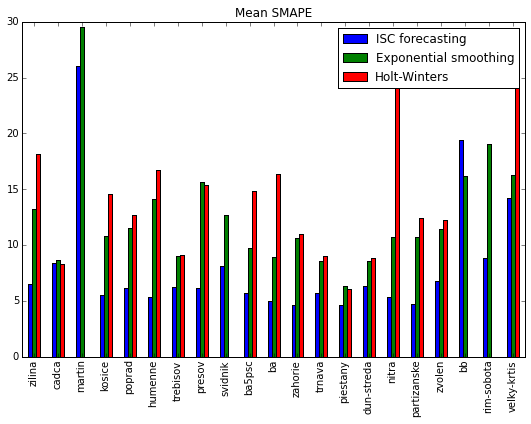

In [111]:

pom = df[['my_mean', 'exp_mean', 'hw_mean']].plot(kind='bar', title="Mean SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

#Standardna odchylka chyby
Podla tychto dat vidiet, ze aj priebeh chyby bol pri nasej metode podstatne stabilnejsi.

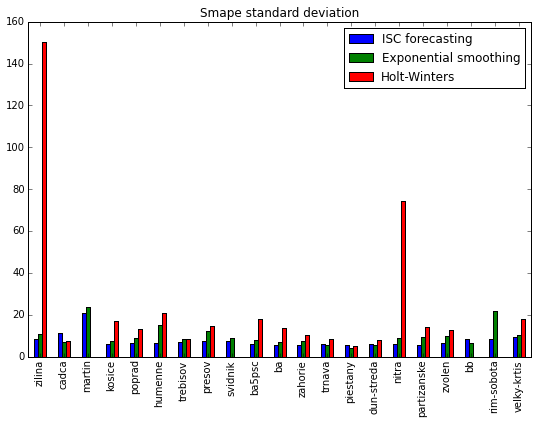

In [74]:
pom = df[['my_std', 'exp_std', 'hw_std']].plot(kind='bar', title="Smape standard deviation")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

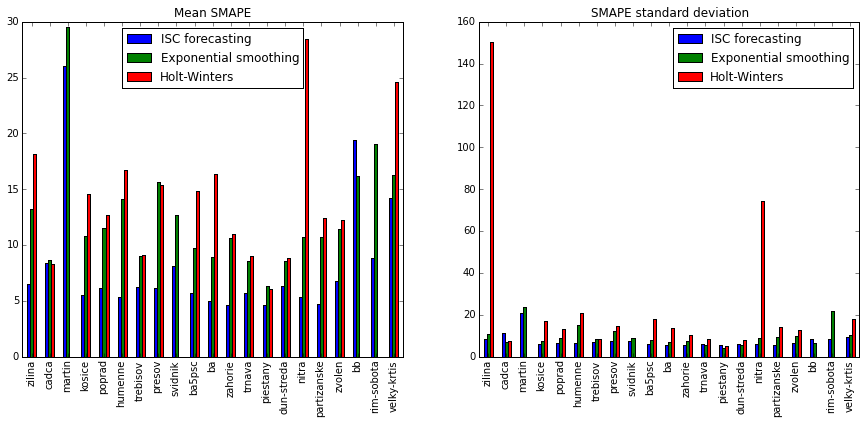

In [115]:
plt.rcParams['figure.figsize'] = 15, 6

fig, axs = plt.subplots(1,2)

pom = df[['my_mean', 'exp_mean', 'hw_mean']].plot(ax=axs[0], kind='bar', title="Mean SMAPE")
L=pom.get_legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

pom = df[['my_std', 'exp_std', 'hw_std']].plot(ax=axs[1], kind='bar', title="SMAPE standard deviation")
L=pom.get_legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

#90% percentil chyby
percentily sa daju pouzit na to, aby sme urcili, ci nahodou neboli chyby sustredene v niektorej casti. Teda ci nahodou nebolo skoro rovnake a zopar vynimiek to kazi.

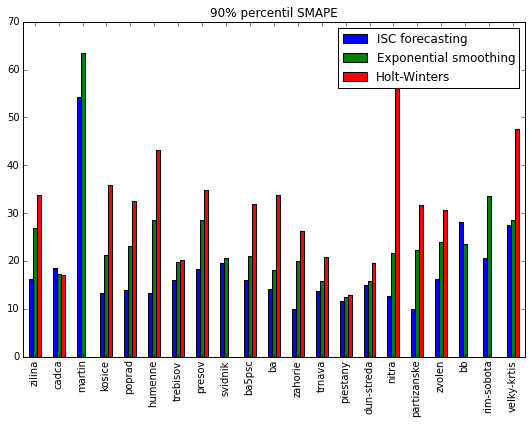

In [75]:
pom = df[['my_90_percentile', 'exp_90_percentile', 'hw_90_percentile']].plot(kind='bar', title="90% percentil SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

# 75% percentil

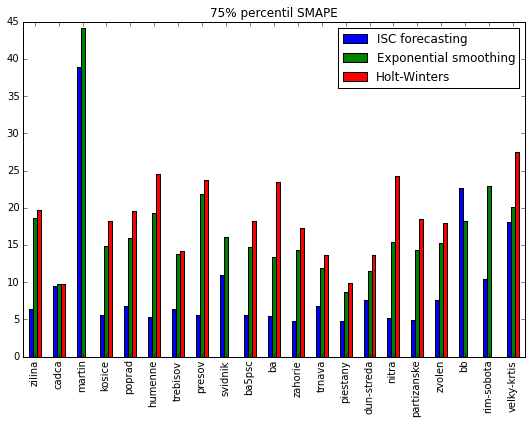

In [76]:
pom = df[['my_75_percentile', 'exp_75_percentile', 'hw_75_percentile']].plot(kind='bar', title="75% percentil SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

#50% percentil

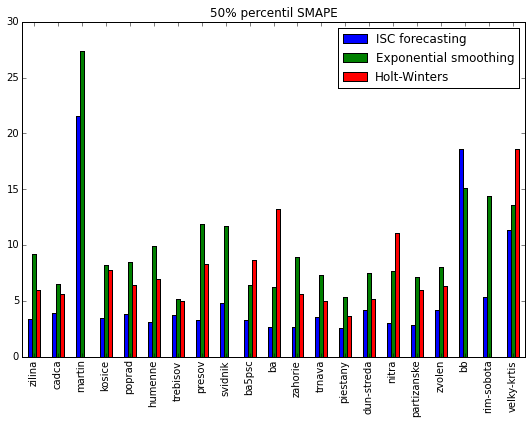

In [77]:
pom = df[['my_50_percentile', 'exp_50_percentile', 'hw_50_percentile']].plot(kind='bar', title="50% percentil SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

#25% percentil

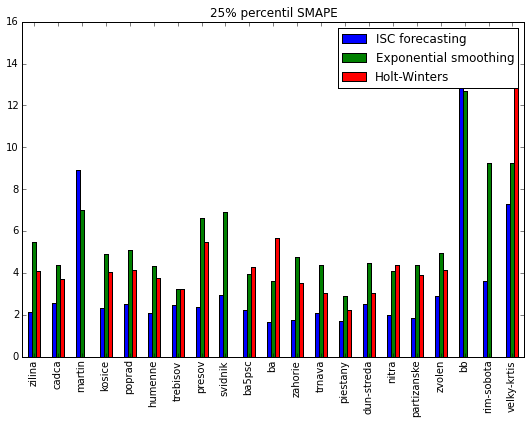

In [78]:
pom = df[['my_25_percentile', 'exp_25_percentile', 'hw_25_percentile']].plot(kind='bar', title="25% percentil SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

#10% percentil

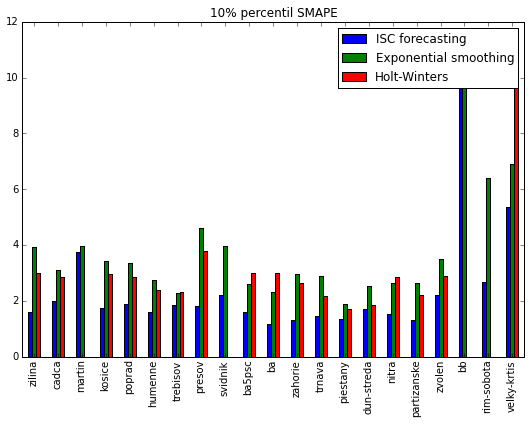

In [79]:
pom = df[['my_10_percentile', 'exp_10_percentile', 'hw_10_percentile']].plot(kind='bar', title="10% percentil SMAPE")
L=plt.legend()
L.get_texts()[0].set_text('ISC forecasting')
L.get_texts()[1].set_text('Exponential smoothing')
L.get_texts()[2].set_text('Holt-Winters')
pom.set_xticklabels([name.split("_")[1] for name in df['dataset']], rotation=90)

# V Piestanoch to fungovalo velmi dobre
Podla priemernych chyb sa zda, ze pre Piestany funguje predikcia velmi dobre. Pozriem sa na to teda trochu podrobnejsie.

In [168]:
plt.rcParams['figure.figsize'] = 15, 10

In [22]:
pn_my_smape= pd.DataFrame.from_csv('./MY/my_smape_92_piestany_suma.csv', header=None)
pn_hw_smape= pd.DataFrame.from_csv('./HW/smape_92_piestany_suma.csv', header=None)
pn_exp_smape= pd.DataFrame.from_csv('./HWbetaFALSE/smape_92_piestany_suma.csv', header=None)

pn_target = pd.DataFrame.from_csv('./MY/my_target_92_piestany_suma.csv', header=None)
pn_my_pred = pd.DataFrame.from_csv('./MY/my_prediction_92_piestany_suma.csv', header=None)
pn_hw_pred = pd.DataFrame.from_csv('./HW/prediction_92_piestany_suma.csv', header=None)
pn_exp_pred = pd.DataFrame.from_csv('./HWbetaFALSE/prediction_92_piestany_suma.csv', header=None)

#Predikovanie bezneho tyzna - Piestany
Tu je zobrazena predikcia spotreby pre zopar za sebou nasledujucich beznych tyzdnov. Pocas tyzdna niesu velke vykyvy v chybe predikcie, ale cez vikend sa to meni. Navrhovana metoda sa pomerne rychlo prisposoby zmene absolutnej hodnoty ako aj vzoru. Pre porovnanie ostatne dve metody s tymto maju problem. Strednu hodnotu sice prisposobia, ale vzor sa nemeni. Su schopne naucit sa len jediny vzor.

In [166]:
dates = [t for t in data[(8*96):].index if t.minute == 0 and (t.hour == 0 or t.hour == 12)]
pn_my_smape.index = dates
pn_my_smape.head()

,1
2013-07-09 00:00:00,27.724986
2013-07-09 12:00:00,1.819785
2013-07-10 00:00:00,1.451726
2013-07-10 12:00:00,1.287587
2013-07-11 00:00:00,1.843423


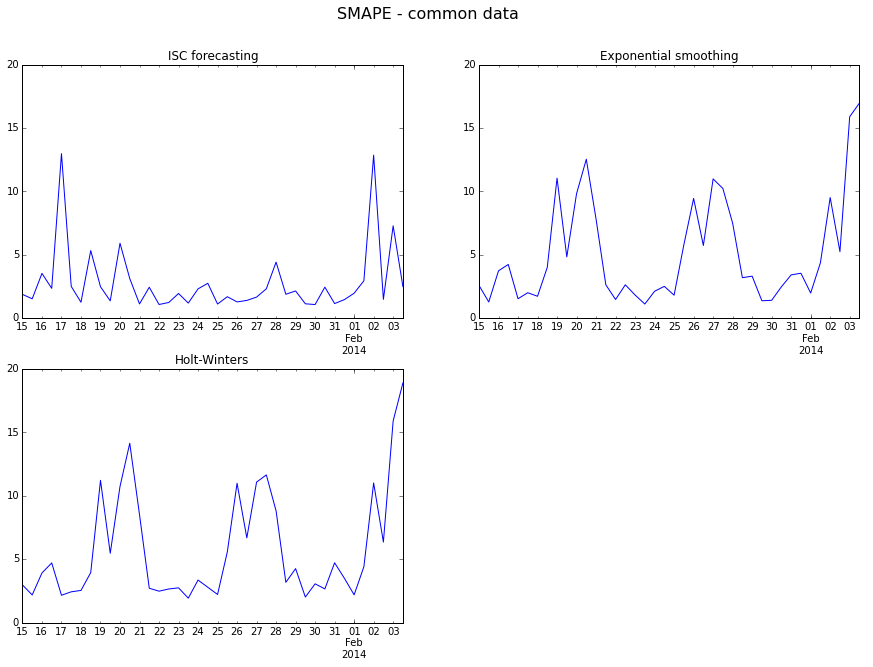

In [199]:
fig, axs = plt.subplots(2,2)
axs[-1, -1].axis('off')
start = 380 # minimalne 0
end = 420 #maximalne 1177

dates = [t for t in data[(8*96):].index if t.minute == 0 and (t.hour == 0 or t.hour == 12)]
pn_my_smape.index = dates
pn_hw_smape.index = dates
pn_exp_smape.index = dates

pom = pn_my_smape[1][start:end].plot(ax=axs[0][0], title='ISC forecasting')
pom.set_ylim((0,20))
pom = pn_hw_smape[1][start:end].plot(ax=axs[1][0], title='Holt-Winters')
pom.set_ylim((0,20))
pom = pn_exp_smape[1][start:end].plot(ax=axs[0][1], title='Exponential smoothing')
pom.set_ylim((0,20))

# pom = pn_my_smape.reset_index()[1][start:end].plot(ax=axs[0][0], title='ISC forecasting')
# pom.set_ylim((0,20))
# pom = pn_hw_smape.reset_index()[1][start:end].plot(ax=axs[0][1], title='Holt-Winters')
# pom.set_ylim((0,20))
# pom = pn_exp_smape.reset_index()[1][start:end].plot(ax=axs[1][0], title='Exponential smoothing')
# pom.set_ylim((0,20))
plt.suptitle('SMAPE - common data', fontsize=16)

zelena je predikcia a modra je skutocna hodnota

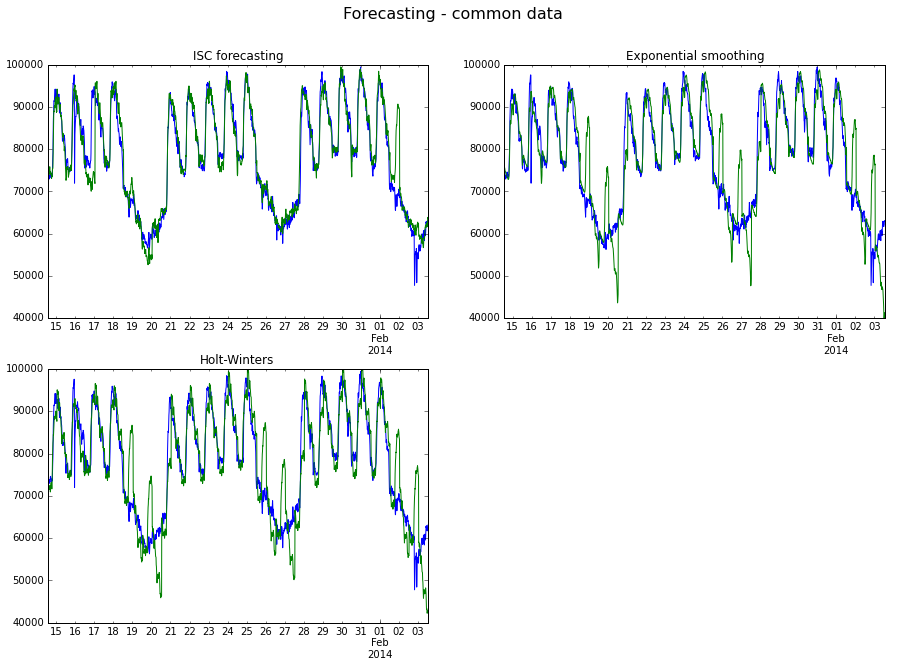

In [201]:
fig, axs = plt.subplots(2,2)
axs[-1, -1].axis('off')
p_start = start*48
p_end = end*48

dates = data[(7*96 + 52):].index

pn_target.index = dates
pn_my_pred.index = dates
pn_hw_pred.index = dates
pn_exp_pred.index = dates

pn_target[2][p_start:p_end].plot(ax=axs[0][0])
pom = pn_my_pred[1][p_start:p_end].plot(ax=axs[0][0], title='ISC forecasting')
pom.set_ylim((40000,100000))
pom.set_xlabel('')
pn_target[2][p_start:p_end].plot(ax=axs[1][0])
pom = pn_hw_pred[1][p_start:p_end].plot(ax=axs[1][0], title='Holt-Winters')
pom.set_ylim((40000,100000))
pom.set_xlabel('')
pn_target[2][p_start:p_end].plot(ax=axs[0][1])
pom = pn_exp_pred[1][p_start:p_end].plot(ax=axs[0][1], title='Exponential smoothing')
pom.set_ylim((40000,100000))
pom.set_xlabel('')

# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[0][0])
# pom = pn_my_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0][0], title='ISC forecasting')
# pom.set_ylim((40000,100000))
# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[0][1])
# pom = pn_hw_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0][1], title='Holt-Winters')
# pom.set_ylim((40000,100000))
# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[1][0])
# pom = pn_exp_pred.reset_index()[1][p_start:p_end].plot(ax=axs[1][0], title='Exponential smoothing')
# pom.set_ylim((40000,100000))
plt.suptitle('Forecasting - common data', fontsize=16)

# Prisposobenie sa nahlej zmene vo vzore - Piestany
tu je v datach vidiet nahlu zmenu vo vzore, ktora trva minilamne tyzden. zmena nieje len v strednej hodnote, ale aj vo vzore. Navrhnuta metoda sa velmi rychlo prisposobi strednej hodnote a pomerne rychlo aj zmene vzoru. Vo vyslednej chybe su teda len dva skoky a inak je tam stale pomerne mala chyba. Ostatne metody sa tiez ryclo prisposobili zmene strednej hodnoty, ale vzor neupravovali

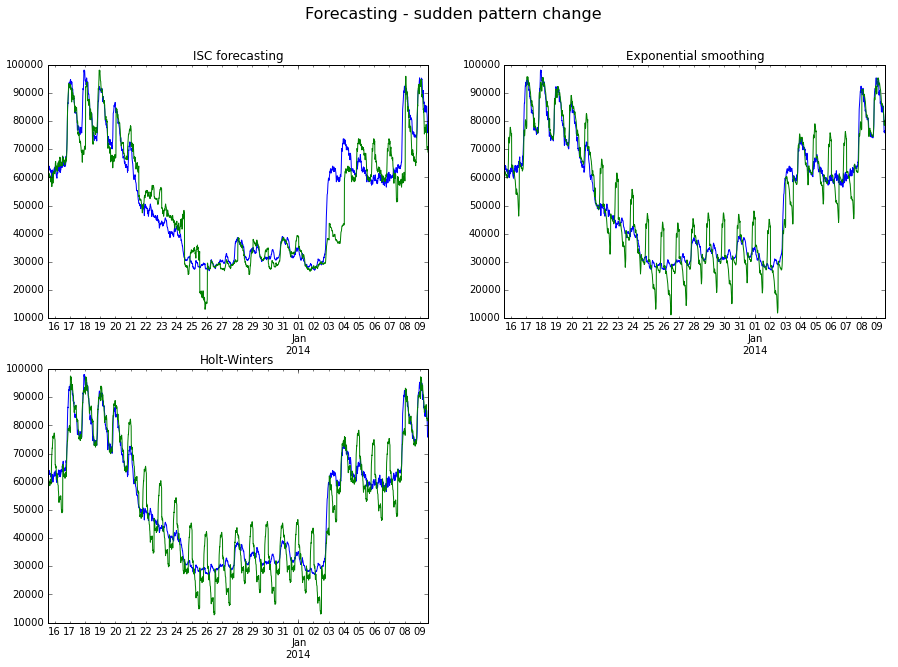

In [202]:
start = 320 # minimalne 0
end = 370 #maximalne 1177
p_start = start*48
p_end = end*48
fig, axs = plt.subplots(2,2)
axs[-1, -1].axis('off')

dates = data[(7*96 + 52):].index

pn_target.index = dates
pn_my_pred.index = dates
pn_hw_pred.index = dates
pn_exp_pred.index = dates

pn_target[2][p_start:p_end].plot(ax=axs[0][0])
pom = pn_my_pred[1][p_start:p_end].plot(ax=axs[0][0], title='ISC forecasting')
pom.set_ylim((10000,100000))
pom.set_xlabel('')
pn_target[2][p_start:p_end].plot(ax=axs[1][0])
pom = pn_hw_pred[1][p_start:p_end].plot(ax=axs[1][0], title='Holt-Winters')
pom.set_ylim((10000,100000))
pom.set_xlabel('')
pn_target[2][p_start:p_end].plot(ax=axs[0][1])
pom = pn_exp_pred[1][p_start:p_end].plot(ax=axs[0][1], title='Exponential smoothing')
pom.set_ylim((10000,100000))
pom.set_xlabel('')

# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[0][0])
# pom = pn_my_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0][0], title='ISC forecasting')
# pom.set_ylim((10000,100000))
# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[0][1])
# pom = pn_hw_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0][1], title='Holt-Winters')
# pom.set_ylim((10000,100000))
# pn_target.reset_index()[2][p_start:p_end].plot(ax=axs[1][0])
# pom = pn_exp_pred.reset_index()[1][p_start:p_end].plot(ax=axs[1][0], title='Exponential smoothing')
# pom.set_ylim((10000,100000))
plt.suptitle('Forecasting - sudden pattern change', fontsize=16)

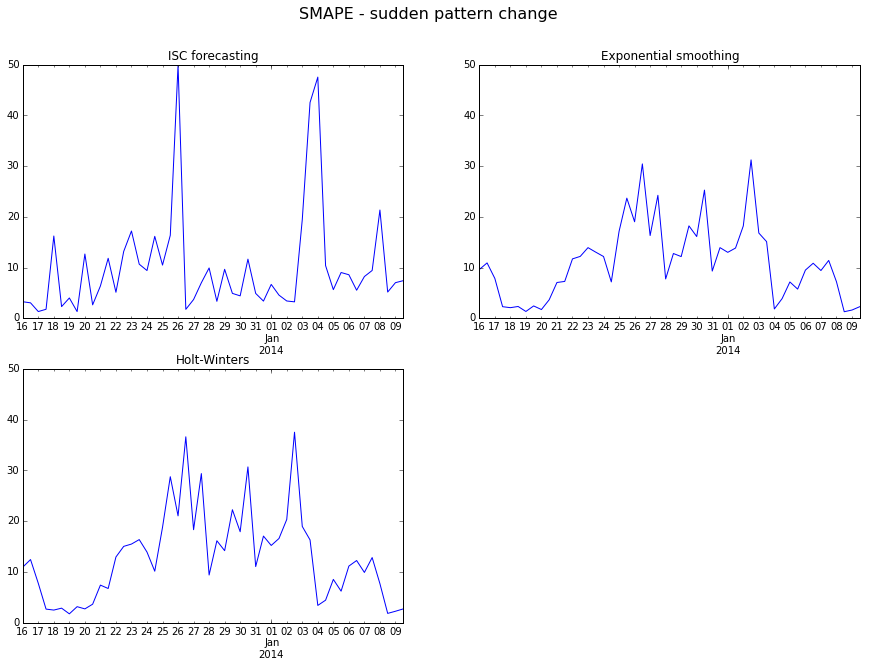

In [203]:
fig, axs = plt.subplots(2,2)
axs[-1, -1].axis('off')

dates = [t for t in data[(8*96):].index if t.minute == 0 and (t.hour == 0 or t.hour == 12)]
pn_my_smape.index = dates
pn_hw_smape.index = dates
pn_exp_smape.index = dates

pom = pn_my_smape[1][start:end].plot(ax=axs[0][0], title='ISC forecasting')
pom.set_ylim((0,50))
pom = pn_hw_smape[1][start:end].plot(ax=axs[1][0], title='Holt-Winters')
pom.set_ylim((0,50))
pom = pn_exp_smape[1][start:end].plot(ax=axs[0][1], title='Exponential smoothing')
pom.set_ylim((0,50))


# pom = pn_my_smape.reset_index()[1][start:end].plot(ax=axs[0][0], title='ISC forecasting')
# pom.set_ylim((0,50))
# pom = pn_hw_smape.reset_index()[1][start:end].plot(ax=axs[0][1], title='Holt-Winters')
# pom.set_ylim((0,50))
# pom = pn_exp_smape.reset_index()[1][start:end].plot(ax=axs[1][0], title='Exponential smoothing')
# pom.set_ylim((0,50))
plt.suptitle('SMAPE - sudden pattern change', fontsize=16)

# Naopak v Martine to celkovo fungovalo zle
dokonca samotna metoda Holt-Winters tam nebola schopna predikovat

In [29]:
mt_my_smape= pd.DataFrame.from_csv('./MY/my_smape_03_martin_suma.csv', header=None)
mt_exp_smape= pd.DataFrame.from_csv('./HWbetaFALSE/smape_03_martin_suma.csv', header=None)

mt_target = pd.DataFrame.from_csv('./MY/my_target_03_martin_suma.csv', header=None)
mt_my_pred = pd.DataFrame.from_csv('./MY/my_prediction_03_martin_suma.csv', header=None)
mt_exp_pred = pd.DataFrame.from_csv('./HWbetaFALSE/prediction_03_martin_suma.csv', header=None)

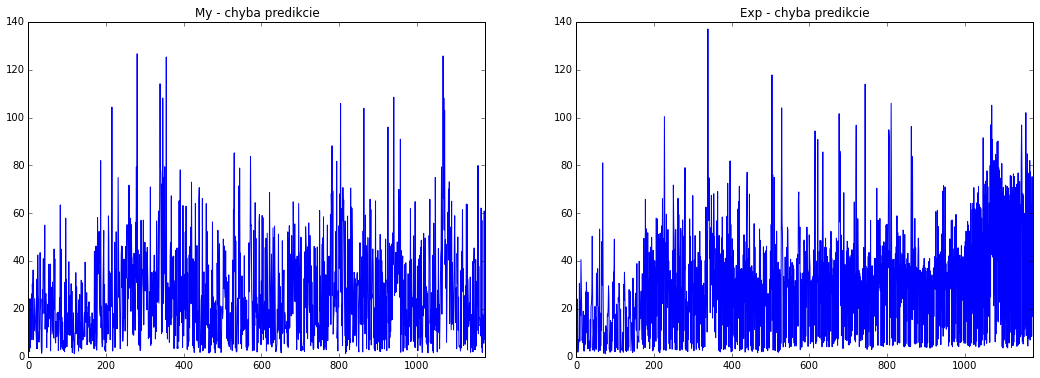

In [30]:
fig, axs = plt.subplots(1,2)
start = 0 # minimalne 0
end = 1177 #maximalne 1177
mt_my_smape.reset_index()[1][start:end].plot(ax=axs[0], title='My - chyba predikcie')
mt_exp_smape.reset_index()[1][start:end].plot(ax=axs[1], title='Exp - chyba predikcie')

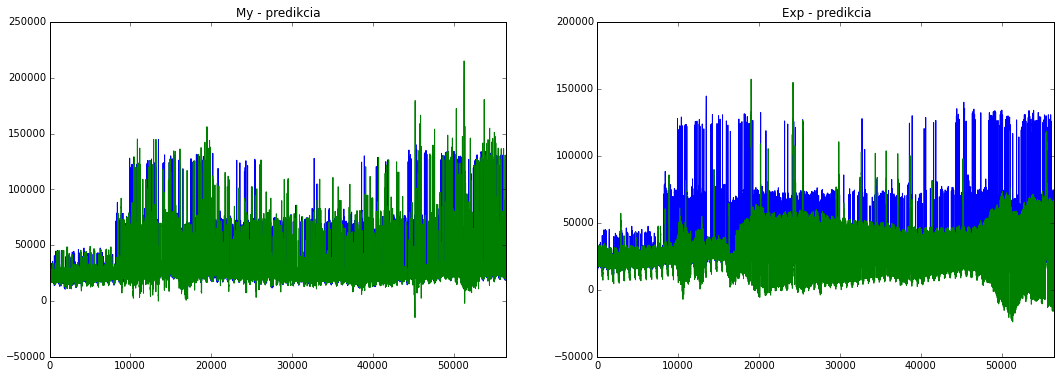

In [31]:
# zelena je predikcia a modra su skutocne data
fig, axs = plt.subplots(1,2)
p_start = start*48
p_end = end*48
mt_target.reset_index()[2][p_start:p_end].plot(ax=axs[0])
mt_my_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0], title='My - predikcia')
mt_target.reset_index()[2][p_start:p_end].plot(ax=axs[1])
mt_exp_pred.reset_index()[1][p_start:p_end].plot(ax=axs[1], title='Exp - predikcia')

Na prvy pohlad sa zda, ze sa exponencialne vyrovnavanie nevie vysporiadat s velkymi zmenami v amplitude

(1    26.066623
dtype: float64, 1    29.506254
dtype: float64)


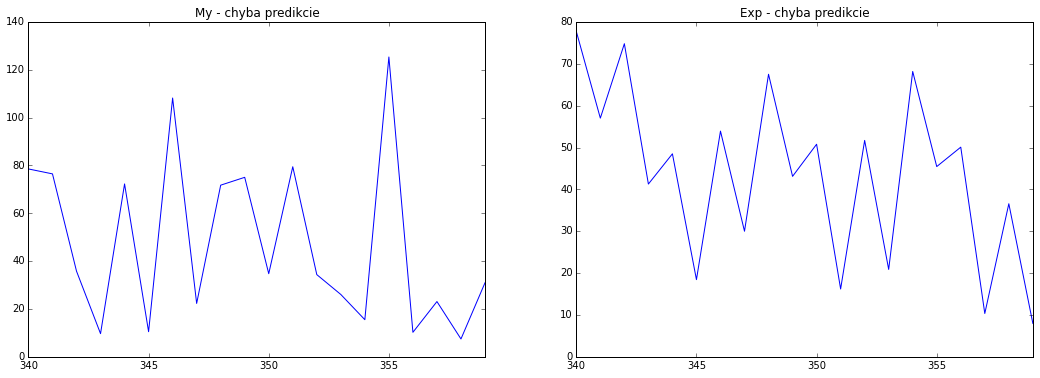

In [34]:
fig, axs = plt.subplots(1,2)
start = 340 # minimalne 0
end = 360 #maximalne 1177
mt_my_smape.reset_index()[1][start:end].plot(ax=axs[0], title='My - chyba predikcie')
mt_exp_smape.reset_index()[1][start:end].plot(ax=axs[1], title='Exp - chyba predikcie')
print(np.mean(mt_my_smape), np.mean(mt_exp_smape))

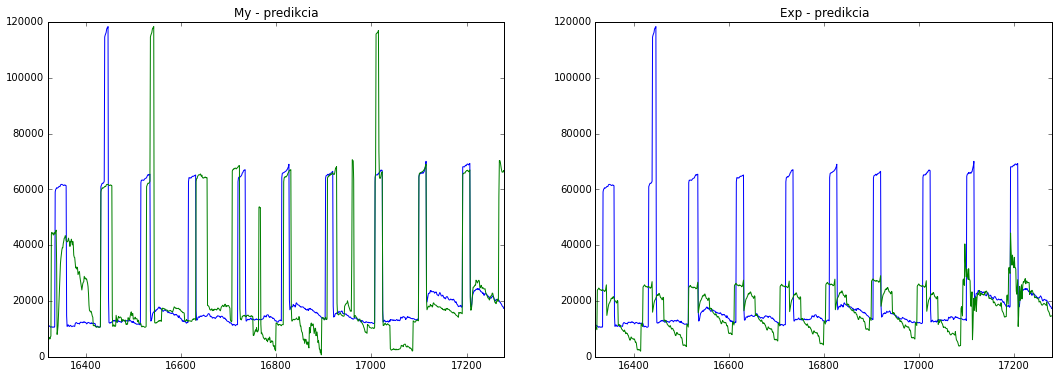

In [33]:
# zelena je predikcia a modra su skutocne data
fig, axs = plt.subplots(1,2)
p_start = start*48
p_end = end*48
mt_target.reset_index()[2][p_start:p_end].plot(ax=axs[0])
mt_my_pred.reset_index()[1][p_start:p_end].plot(ax=axs[0], title='My - predikcia')
mt_target.reset_index()[2][p_start:p_end].plot(ax=axs[1])
mt_exp_pred.reset_index()[1][p_start:p_end].plot(ax=axs[1], title='Exp - predikcia')

V datach je velmi vela vzorov a hlavne su velmi velke vykyvy medzi jednotlivymi dnami a v priebehu dna. Obe metody tu funguju dost zle. Exponencialne vyrovnavanie sa nedokaze naucit nove vzory a stale opakuje jeden, ktory pomaly deformuje. Navrhovana metoda sa zas snazi najst najlepsi vzor v historii, ale castokrat sa stane, ze sa vytiahne vzor, ktory sa vyskytol raz a uz nikdy viac. To sposobi, ze napriek tomu, ze sa vyberie najpodobnejsi vzor na zaklade jeho zaciatku, je velka sanca, ze to pokracovanie uz nebude sediet. Chcelo by to teda zolzitejsiu metodu, pouzivajucu symboly ktora by ratala s frekvenciou vyskytov symbolov a/alebo by sa pozerala aj dalej do minulosti.

Hlavnou vyhodou navrhovanej metody je teda to, ze sa dokaze velmi rychlo prisposobit novym datam

#Boxplot chyb pre rozne datasety a rozne metody
Este zopar boxplotov chyb na roznych metodach na to, aby sa dali porovnat aj kvanitly, maximalne hodnoty a vynimky.

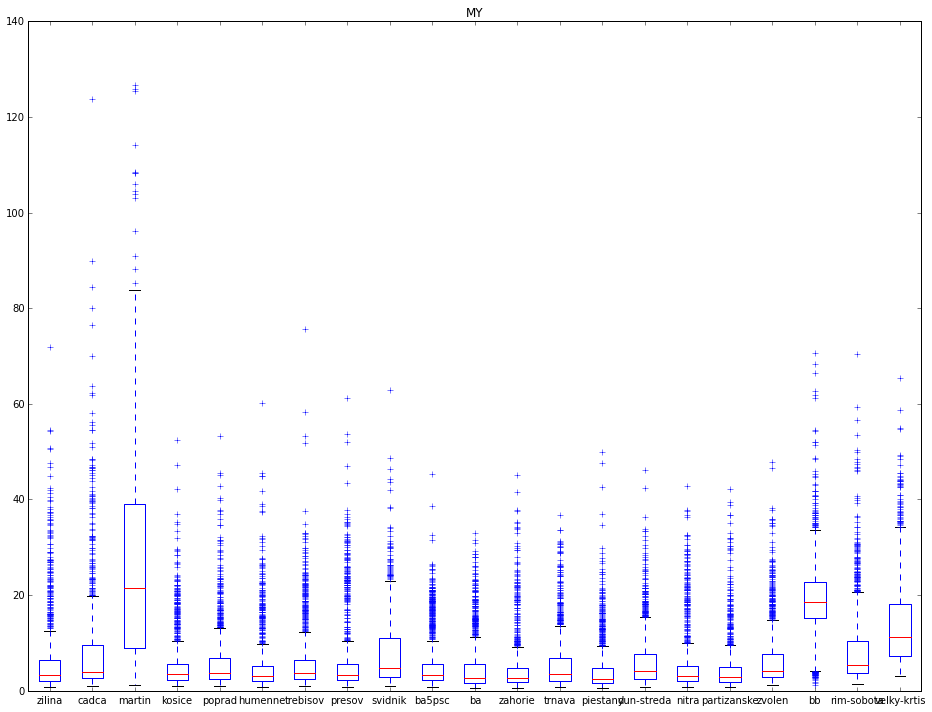

In [19]:
my_data = pd.DataFrame()
for filename in glob.glob('./MY/my_smape*.csv'):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    my_data[dataset_name] = tmp_df.reset_index()[1]
my_data.plot(kind="box", title="MY")

To iste, len maximum y-ovej osi je nastavene na 100

(0, 100)

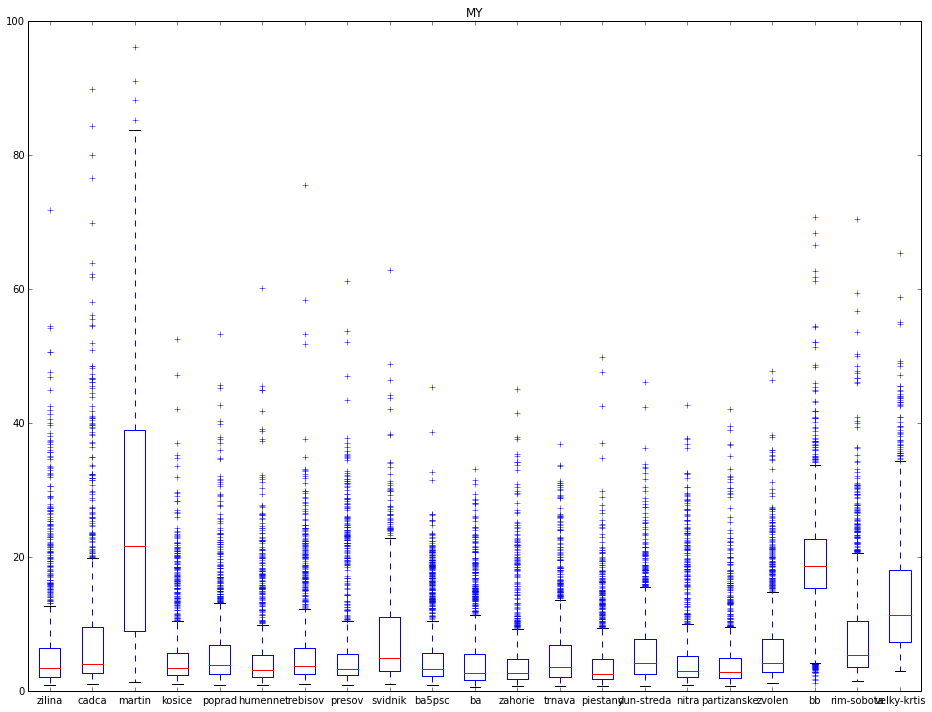

In [24]:
my_data.plot(kind="box", title="MY")
plt.ylim((0,100))

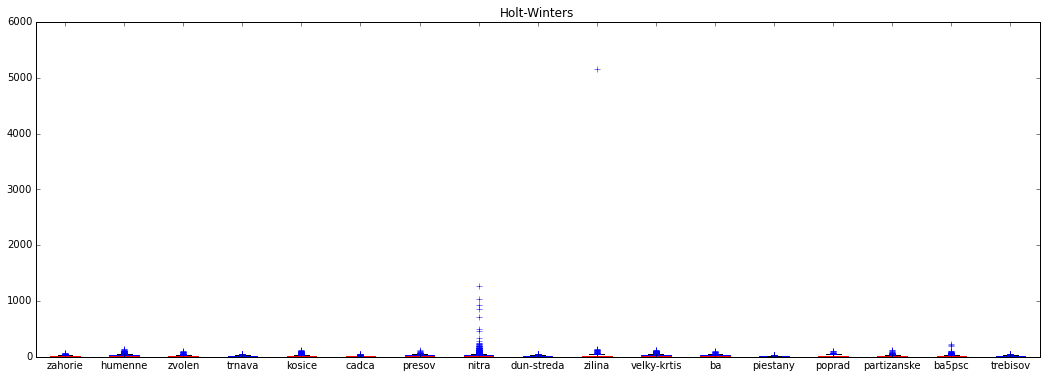

In [37]:
hw_data = pd.DataFrame()
for filename in glob.glob('./HW/smape*.csv'):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    hw_data[dataset_name] = tmp_df.reset_index()[1]
hw_data.plot(kind="box", title="Holt-Winters")

To iste, len maximum y-ovej osi je nastavene na 100

(0, 100)

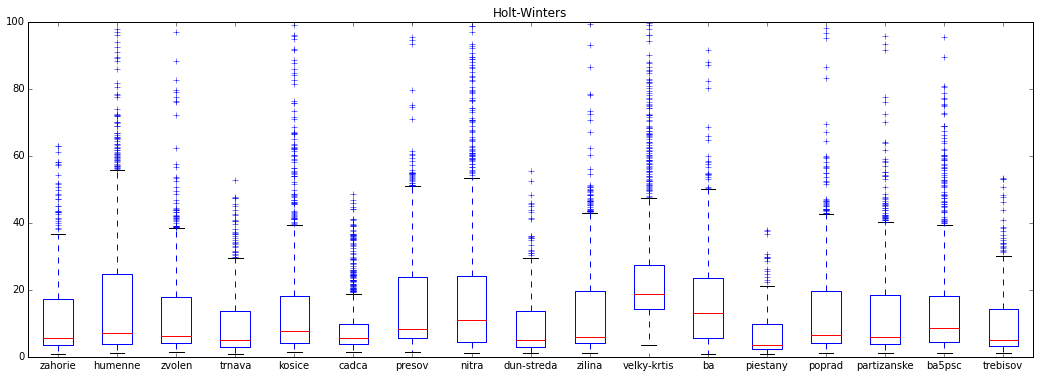

In [40]:
pom = hw_data.plot(kind="box", title="Holt-Winters")
pom.set_ylim((0,100))

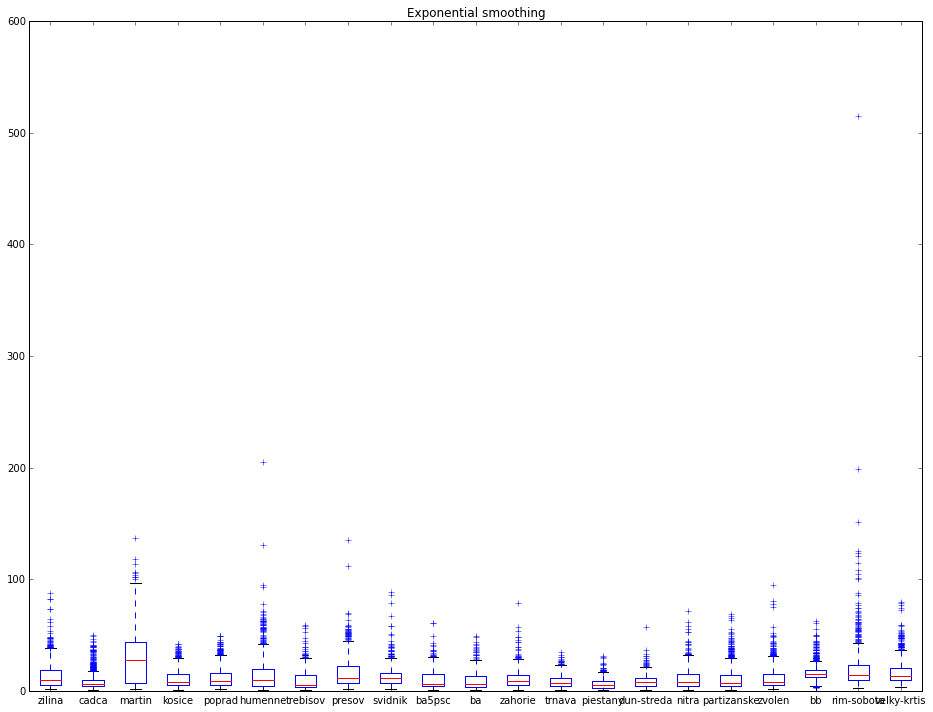

In [25]:
hw_false_data = pd.DataFrame()
for filename in glob.glob('./HWbetaFALSE/smape*.csv'):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    hw_false_data[dataset_name] = tmp_df.reset_index()[1]
hw_false_data.plot(kind="box", title="Exponential smoothing")

To iste, len maximum y-ovej osi je nastavene na 100

(0, 100)

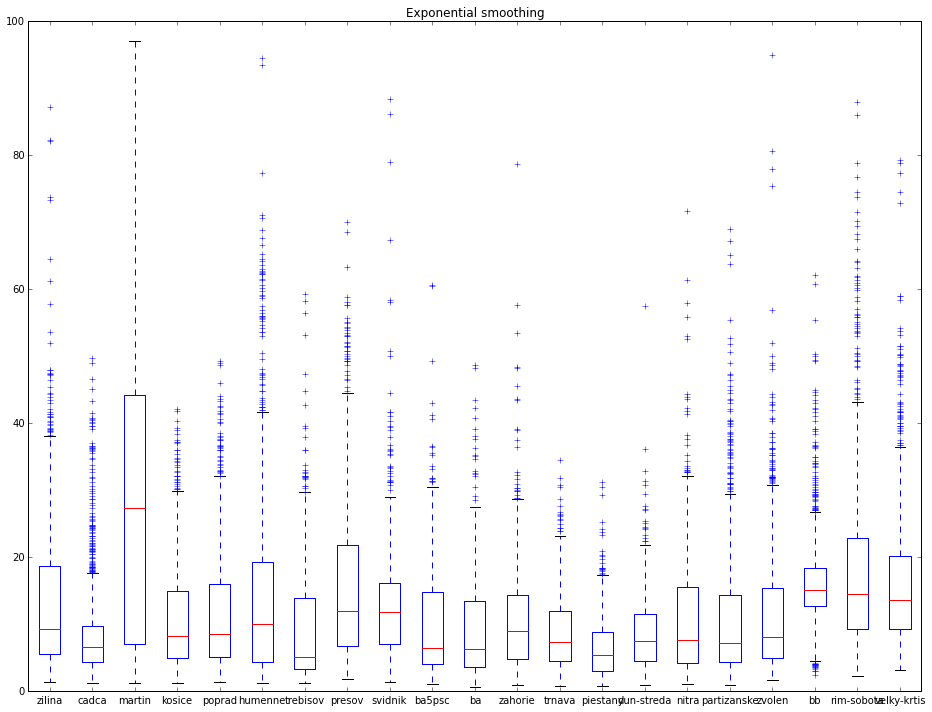

In [27]:
hw_false_data.plot(kind="box", title="Exponential smoothing")
plt.ylim((0,100))

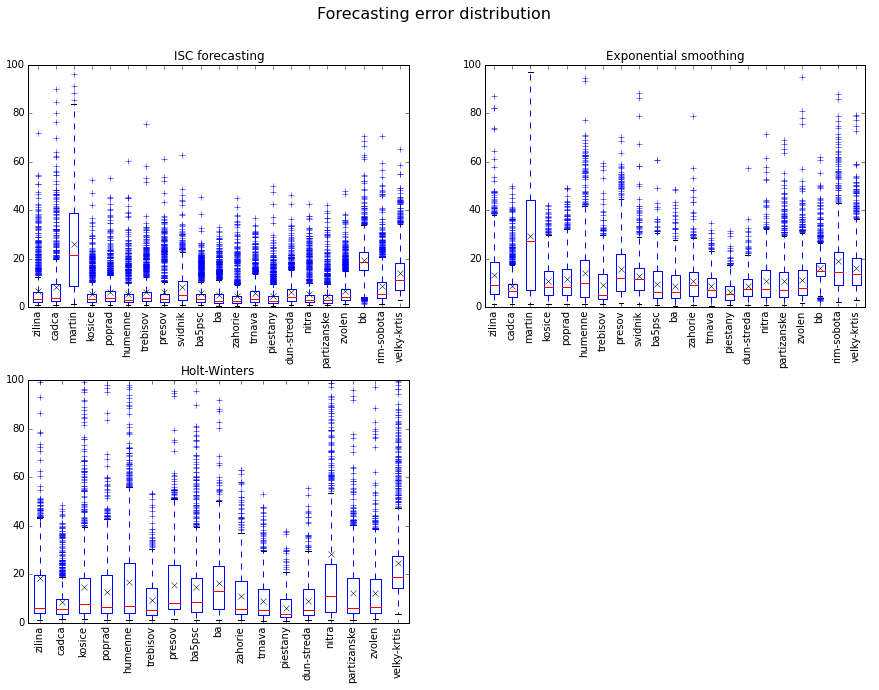

In [198]:
plt.rcParams['figure.figsize'] = 15, 10


meanprops = {'color': 'black', 'marker': 'x', 'markersize': 6}
#boxplot.meanprops.markerfacecolor : 'b'
#boxplot.meanprops.markeredgecolor : 'b'
#boxplot.meanprops.markersize      :  6
#boxplot.meanprops.linestyle       : 'none'
#boxplot.meanprops.linewidth       : 1.0}
fig, axs = plt.subplots(2,2)
axs[-1, -1].axis('off')
# fig.tight_layout()
plt.subplots_adjust(hspace = 0.3)

my_data = pd.DataFrame()
for filename in sorted(glob.glob('./MY/my_smape*.csv')):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    my_data[dataset_name] = tmp_df.reset_index()[1]
pom = my_data.plot(ax=axs[0][0], kind="box", title="ISC forecasting", showmeans=True, meanprops=meanprops)
pom.set_ylim((0,100))
pom.set_xticklabels([label.get_text() for label in pom.get_xticklabels()], rotation=90)

hw_false_data = pd.DataFrame()
for filename in sorted(glob.glob('./HWbetaFALSE/smape*.csv')):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    hw_false_data[dataset_name] = tmp_df.reset_index()[1]
pom = hw_false_data.plot(ax=axs[0][1], kind="box", title="Exponential smoothing", showmeans=True, meanprops=meanprops)
pom.set_ylim((0,100))
pom.set_xticklabels([label.get_text() for label in pom.get_xticklabels()], rotation=90)

hw_data = pd.DataFrame()
for filename in sorted(glob.glob('./HW/smape*.csv')):
    dataset_name = filename.split("_")[-2]
    tmp_df = pd.DataFrame.from_csv(filename, header=None)
    hw_data[dataset_name] = tmp_df.reset_index()[1]
pom = hw_data.plot(ax=axs[1][0], kind="box", title="Holt-Winters", showmeans=True, meanprops=meanprops)
pom.set_ylim((0,100))
pom.set_xticklabels([label.get_text() for label in pom.get_xticklabels()], rotation=90)
plt.suptitle('Forecasting error distribution', fontsize=16)